In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataFiles/ImportantFeatures.csv')
df.head()

,DTP,Ser,Gly,Tyr,Gln,Polar,Hydrophobicity,Ile,Ala,Asp,...,Thr.1_3,Trans_Helices_3,Trans_Helices_8,LowComplexityRegions_6,Trans_Helices_7,LowComplexityRegions_8,Tyr.1_3,Trans_Helices_2,Thr.1_4,LowComplexityRegions_9
0,0,0.241186,0.082153,0.164048,0.020253,0.304237,0.976817,0.316374,0.201217,0.135014,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.276723,0.157443,0.094857,0.037053,0.396147,0.968404,0.219536,0.377079,0.150936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.226908,0.118346,0.093333,0.040506,0.472872,0.963205,0.269995,0.179019,0.206254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.315472,0.109911,0.085555,0.029843,0.439435,0.960029,0.306474,0.217427,0.210709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.176325,0.195615,0.031422,0.034096,0.254036,0.976340,0.121198,0.547961,0.166653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = df.iloc[:, 1:]
y = df['DTP']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

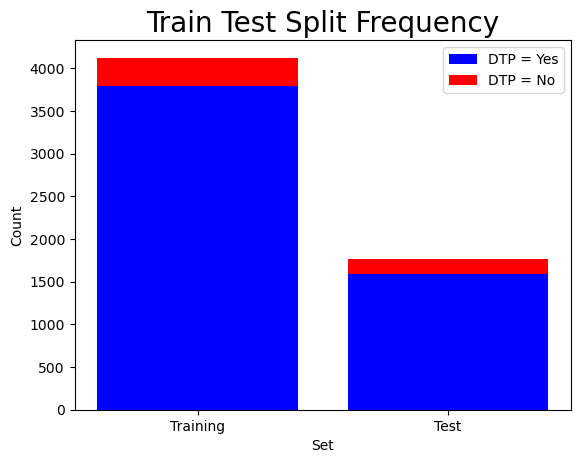

In [5]:
# Count the number of observations for each label in each set
train_counts = y_train.value_counts().tolist()
test_counts = y_test.value_counts().tolist()

# Plot the counts
plt.title("Train Test Split Frequency", fontsize=20)
plt.bar(['Training', 'Test'], [train_counts[0], test_counts[0]], color = 'b')
plt.bar(['Training', 'Test'], [train_counts[1], test_counts[1]], bottom=[train_counts[0], test_counts[0]], color = 'r')
plt.xlabel('Set')
plt.ylabel('Count')
plt.legend(['DTP = Yes', 'DTP = No'])
plt.show()

In [6]:
# Calculate the ratio of 0's in each set
train_ratio = (y_train == 0).sum() / len(y_train)
test_ratio = (y_test == 0).sum() / len(y_test)
# val_ratio = (y_val == 0).sum() / len(y_val)

# Print the ratios
print(f'Ratio of 0\'s in train set: {train_ratio:.2%}')
print(f'Ratio of 0\'s in test set: {test_ratio:.2%}')
# print(f'Ratio of 0\'s in validation set: {val_ratio:.2%}')

Ratio of 0's in train set: 8.17%
Ratio of 0's in test set: 10.18%


In [7]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader


# Convert the training set and test set to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
y_test_tensor = torch.from_numpy(y_test.values).long()



# Convert the training set and test set to PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


# Create data loaders for the training set and test set
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [8]:
# import torch
# import torch.nn as nn

# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, 
#                                 hidden_size_4, hidden_size_5, output_size):
#         super(MLP, self).__init__()
        
#         self.fc1 = nn.Linear(input_size, hidden_size_1)
#         self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
#         self.fc3 = nn.Linear(hidden_size_2, hidden_size_3)
#         self.fc4 = nn.Linear(hidden_size_3, hidden_size_4)
#         self.fc5 = nn.Linear(hidden_size_4, hidden_size_5)
#         self.fc6 = nn.Linear(hidden_size_5, output_size)
        
#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = torch.relu(self.fc4(x))
#         x = torch.relu(self.fc5(x))
#         x = self.fc6(x)
#         return x

# # Initialize the model
# input_size = 59
# hidden_size_1 = 128
# hidden_size_2 = 64
# hidden_size_3 = 32
# hidden_size_4 = 16
# hidden_size_5 = 8
# output_size = 1
# model = MLP(input_size, hidden_size_1, hidden_size_2, hidden_size_3, hidden_size_4, hidden_size_5, output_size)

# # Define the loss function and optimizer
# criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters())

# # Convert the data to PyTorch tensors
# X_train = torch.tensor(X_train.values, dtype=torch.float32)
# y_train = torch.tensor(y_train.values, dtype=torch.long)

# X_test = torch.tensor(X_test.values, dtype=torch.float32)
# y_test = torch.tensor(y_test.values, dtype=torch.long)


# # Training loop
# for epoch in range(100):
#     # Forward pass
#     y_train = torch.tensor(y_train, dtype=torch.float)
#     y_pred = model(X_train)
#     _, y_pred_labels = torch.max(y_pred, dim=1)
#     loss = criterion(y_pred, y_train)
#     # Backward pass and optimization
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     # Print the loss every 10 epochs
#     if (epoch+1) % 10 == 0:
#         print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# # Evaluate the model on the test set
# with torch.no_grad():
#     y_test_pred = model(X_test)
#     _, y_test_pred_labels = torch.max(y_test_pred, dim=1)
#     test_loss = criterion(y_test_pred_labels, y_test)
#     print(f'Test Loss: {test_loss.item():.4f}')

# # Evaluate the model on the validation set
# with torch.no_grad():
#     y_val_pred = model(X_val)
#     _, y_val_pred_labels = torch.max(y_val_pred, dim=1)
#     val_loss = criterion(y_val_pred_labels, y_val)
#     print(f'Validation Loss: {val_loss.item():.4f}')



In [9]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, 
                                hidden_size_4, hidden_size_5, output_size):
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3)
        self.fc4 = nn.Linear(hidden_size_3, hidden_size_4)
        self.fc5 = nn.Linear(hidden_size_4, hidden_size_5)
        self.fc6 = nn.Linear(hidden_size_5, output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# Initialize the model
input_size = 59
hidden_size_1 = 128
hidden_size_2 = 64
hidden_size_3 = 32
hidden_size_4 = 16
hidden_size_5 = 8
output_size = 1
model = MLP(input_size, hidden_size_1, hidden_size_2, hidden_size_3, hidden_size_4, hidden_size_5, output_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [10]:
def train_mlp(train_dataloader, test_dataloader, input_size, output_size, hidden_sizes, n_epochs):
    # Define the model architecture
    layers = []
    layers.append(nn.Linear(input_size, hidden_sizes[0]))
    layers.append(nn.ReLU())
    for i in range(1, len(hidden_sizes)):
        layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(hidden_sizes[-1], output_size))
    layers.append(nn.LogSoftmax(dim=1))
    model = nn.Sequential(*layers)
    # Define the loss function and optimizer
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    for epoch in range(n_epochs):
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            log_ps = model(inputs)
            loss = criterion(log_ps, labels)
            loss.backward()
            optimizer.step()
   
    return model


In [11]:
n_epochs = 10
hidden_sizes = [128, 64, 32, 16, 8]
trained_model = train_mlp(train_dataloader, test_dataloader, input_size, output_size, hidden_sizes, n_epochs)


IndexError: Target 1 is out of bounds.